# DATA 4319: Statistical & Machine Learning 

## Project 1: The Perceptron Learning Model  on a Different Dataset

 

In [2]:
using CSV
""" Provided you have a saved and valid .csv file in your current working directory, you may 
    load this file as a Dataframe using the following syntax. 
"""

wine = CSV.read("C:/Users/lykha/OneDrive/Documents/Spring 2019/Machine Learning/wine.csv")
wine = wine[1:100,1:5]

,Wine,Alcohol,Malic.acid,Ash,Acl
,Int64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,1,14.23,1.71,2.43,15.6
2,1,13.2,1.78,2.14,11.2
3,1,13.16,2.36,2.67,18.6
4,1,14.37,1.95,2.5,16.8
5,1,13.24,2.59,2.87,21.0
6,1,14.2,1.76,2.45,15.2
7,1,14.39,1.87,2.45,14.6
8,1,14.06,2.15,2.61,17.6
9,1,14.83,1.64,2.17,14.0


In [23]:
# We will only use the alcohol and malic acid level for our analysis 
data = [x for x in zip(wine[2], wine[3], wine[1])]

100-element Array{Tuple{Float64,Float64,Int64},1}:
 (14.23, 1.71, 1)
 (13.2, 1.78, 1) 
 (13.16, 2.36, 1)
 (14.37, 1.95, 1)
 (13.24, 2.59, 1)
 (14.2, 1.76, 1) 
 (14.39, 1.87, 1)
 (14.06, 2.15, 1)
 (14.83, 1.64, 1)
 (13.86, 1.35, 1)
 (14.1, 2.16, 1) 
 (14.12, 1.48, 1)
 (13.75, 1.73, 1)
 ⋮               
 (11.64, 2.06, 2)
 (12.08, 1.33, 2)
 (12.08, 1.83, 2)
 (12.0, 1.51, 2) 
 (12.69, 1.53, 2)
 (12.29, 2.83, 2)
 (11.62, 1.99, 2)
 (12.47, 1.52, 2)
 (11.81, 2.12, 2)
 (12.29, 1.41, 2)
 (12.37, 1.07, 2)
 (12.29, 3.17, 2)

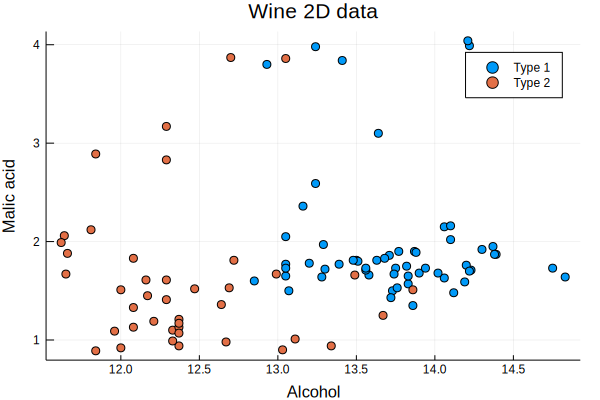

In [24]:
using Plots
scatter([x[1:2] for x in data if x[3] == 1], label = "Type 1")
scatter!([x[1:2] for x in data if x[3] != 1], label = "Type 2")
plot!(title = "Wine 2D data", xlabel = "Alcohol", ylabel = "Malic acid")

In [27]:
# Our data set D consists of two vectors of information. 
# Assign X: input data
# Assign Y: known values 
X, Y = [[x[1], x[2]] for x in data], [x[3] == 1 ? 1 : -1 for x in data]

(Array{Float64,1}[[14.23, 1.71], [13.2, 1.78], [13.16, 2.36], [14.37, 1.95], [13.24, 2.59], [14.2, 1.76], [14.39, 1.87], [14.06, 2.15], [14.83, 1.64], [13.86, 1.35]  …  [12.08, 1.83], [12.0, 1.51], [12.69, 1.53], [12.29, 2.83], [11.62, 1.99], [12.47, 1.52], [11.81, 2.12], [12.29, 1.41], [12.37, 1.07], [12.29, 3.17]], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1  …  -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [28]:
# Assign random weights
w = rand(3)

# Perceptron Hypothesis Function 
function h(w, x)
    x_new = [1.0, x[1], x[2]]
    return w'x_new > 0 ? 1 : -1
end

h (generic function with 1 method)

In [29]:
# Perceptron Learning Algorithm 
function PLA(w, x, y)
    if h(w, x) != y
        w += y*[1.0, x[1], x[2]]
    end
    return w
end

PLA (generic function with 1 method)

In [38]:
# Iterate the PLA 
for i = 1:3000
    # Choose random entries to update (if possible )
    j = rand(1:100)
    w = PLA(w, X[j], Y[j])
end

In [35]:
# Create a user friendly function that predicts the species of a given flower
function predictor(n)
    return h(w, X[n]) == 1 ? "Type 1" : "Type 2"
end


predictor (generic function with 1 method)

In [36]:
# Test your predictions!
predictor(60)

"Type 2"

In [37]:
g(x) = w[2]

g (generic function with 1 method)